In [2]:
# loading IMDB dataset

from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
# Encoding into binary matrix

import numpy as np

def vectorize_sequence(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence]=1.
    return results

x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [4]:
# NN architecture

from keras import models
from keras import layers


model = models.Sequential()

model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [5]:
# validation set

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [6]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 7s 148ms/step - loss: 0.5910 - accuracy: 0.6975 - val_loss: 0.3920 - val_accuracy: 0.8641
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3216 - accuracy: 0.9037 - val_loss: 0.3041 - val_accuracy: 0.8866
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2272 - accuracy: 0.9310 - val_loss: 0.2785 - val_accuracy: 0.8904
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1736 - accuracy: 0.9472 - val_loss: 0.2819 - val_accuracy: 0.8895
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1425 - accuracy: 0.9567 - val_loss: 0.3021 - val_accuracy: 0.8793
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1143 - accuracy: 0.9671 - val_loss: 0.2907 - val_accuracy: 0.8865
Epoch 7/20
30/30 [==============================] - 1s 17ms/step - loss: 0.0928 - accuracy: 0.9760 - val_loss: 0.3067 - val_accuracy: 0.8840
Epoch 8/20
3

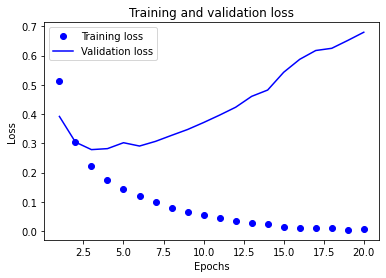

In [7]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']

epochs = range(1, len(acc)+1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')

plt.ylabel('Loss')
plt.legend()
plt.show()

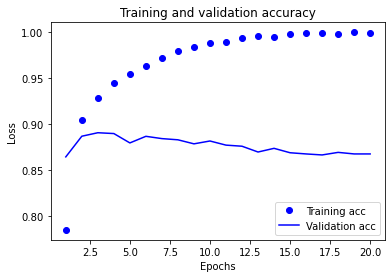

In [8]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model.predict(x_test)